In [2]:
pip install -U fortran-magic

In [3]:
%load_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

> *Un assert se podría traducir en Español como una comprobación. Se trata por lo tanto de la verificación de una condición determinada, que de no ser cierta, lanzará la excepción AssertionError.* Tomado de: https://ellibrodepython.com/assert-python

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
#miejemplo
x = [1,2,3.0,True, "holi", 6]
x

[1, 2, 3.0, True, 'holi', 6]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
#miejemplo 
primero = x[0]
cuarto = x[3]
print("primero: ", primero)
print('cuarto: ', cuarto)

primero:  1
cuarto:  True


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
#miejemplo
ultimo = x[-1]
antepenultimo = x[-3]
print("ultimo: ", ultimo)
print("antepenultimo: ", antepenultimo)

ultimo:  6
antepenultimo:  True


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
#miejemplo
sublista = x[2:4]
sublista

[3.0, True]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
#miejemplo
primero_cuarto = x[:4]
primero_cuarto

[1, 2, 3.0, True]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
#miejemplo
despues_segundo = x[4:]
despues_segundo

['holi', 6]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
#miejemplo
x = [1,2,3,4,5,6,7,8]
x[2:9:3]

[3, 6]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
#miejemplo
x[::-2]

[8, 6, 4, 2]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
#miejemplo
x = ['a','b','c','d','e','f','g']
print("antes: ", x)
x.append('20')
print("despues: ", x)

antes:  ['a', 'b', 'c', 'd', 'e', 'f', 'g']
despues:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', '20']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
x = [10,11,12,13,14,15,16]
[y * 3 for y in x]

[30, 33, 36, 39, 42, 45, 48]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
#miejemplo
traduccion = {'blue':'azul', 'red':'rojo','yellow':'amarillo','green':'verde'}
traduccion

{'blue': 'azul', 'green': 'verde', 'red': 'rojo', 'yellow': 'amarillo'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
#miejemplo
traduccion['black'] = 'negro'
traduccion

{'black': 'negro',
 'blue': 'azul',
 'green': 'verde',
 'red': 'rojo',
 'yellow': 'amarillo'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
#miejemplo
del traduccion['green']
traduccion

{'black': 'negro', 'blue': 'azul', 'red': 'rojo', 'yellow': 'amarillo'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
#miejemplo
e = [[12,15,30,52],
     [8,1,16,2,3],
     [4,7,2,3],
     [6,5,2,3]]
f = [[1,2,3,5],
     [9,12,15,45],
     [8,26,30,15]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time
#miejemplo
matmul(f,e)

CPU times: user 29 µs, sys: 4 µs, total: 33 µs
Wall time: 35 µs


[[70, 63, 78, 80], [534, 477, 582, 672], [514, 431, 746, 603]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.36129893588726947, 0.33932142083342176, 0.5754410807213414],
 [0.06428533003190562, 0.8111467013990689, 0.7192886132737848]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.99 s, sys: 4 ms, total: 5.99 s
Wall time: 5.99 s


In [ ]:
%%time
#miejemplo
rand_e = random_matrix(300,50)
rand_f = random_matrix(50,300)
y = matmul(rand_e, rand_f)

CPU times: user 1.36 s, sys: 1.09 ms, total: 1.36 s
Wall time: 1.38 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 181 µs


333328333350000.0

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              3 LOAD_NAME                1 (b)
              6 LOAD_NAME                2 (c)
              9 BINARY_MULTIPLY
             10 BINARY_ADD
             11 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
#miejemplo
data2 = np.array([10,11,12,13,14,15,16,17,18])
data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
#miejemplo
data2 + data2

array([20, 22, 24, 26, 28, 30, 32, 34, 36])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
data2.append(20)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
#miejemplo
tres_por_tres =  data2.reshape(3,3)
tres_por_tres

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
#miejemplo
data2 = np.arange(24).reshape(4,6)
data2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
#miejemplo
data2 * data2

array([[  0,   1,   4,   9,  16,  25],
       [ 36,  49,  64,  81, 100, 121],
       [144, 169, 196, 225, 256, 289],
       [324, 361, 400, 441, 484, 529]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
#miejemplo
np.log10(data2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


array([[      -inf, 0.        , 0.30103   , 0.47712125, 0.60205999,
        0.69897   ],
       [0.77815125, 0.84509804, 0.90308999, 0.95424251, 1.        ,
        1.04139269],
       [1.07918125, 1.11394335, 1.14612804, 1.17609126, 1.20411998,
        1.23044892],
       [1.25527251, 1.2787536 , 1.30103   , 1.32221929, 1.34242268,
        1.36172784]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
#miejemplo
(data2 % 2) == 0

array([[ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
#miejemplo
(data2 < 20) & ((data2 % 2) == 0)

array([[ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
#miejemplo
data2 @ data2.T

array([[  55,  145,  235,  325],
       [ 145,  451,  757, 1063],
       [ 235,  757, 1279, 1801],
       [ 325, 1063, 1801, 2539]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
#miejemplo
seno =  np.sin(np.linspace(3.14, 2*3.14, 10))
coseno =  np.cos(np.linspace(3.14, 2*3.14, 10))
coseno

array([-0.99999873, -0.94029639, -0.76729423, -0.50183791, -0.17591327,
        0.17120782,  0.49769944,  0.7642214 ,  0.93865946,  0.99999493])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
#miejemplo
coseno[0]

-0.9999987317275395

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
#miejemplo
coseno[:5]

array([-0.99999873, -0.94029639, -0.76729423, -0.50183791, -0.17591327])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
#miejemplo
coseno[7:]

array([0.7642214 , 0.93865946, 0.99999493])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
#miejemplo
coseno[::4]

array([-0.99999873, -0.17591327,  0.93865946])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
#miejemplo
print("coseno: \n", coseno)
print("coseno > -0.2: \n", coseno >-0.2)
print("cosenos[coseno > -0.2]: \n", coseno[coseno > -0.2])

coseno: 
 [-0.99999873 -0.94029639 -0.76729423 -0.50183791 -0.17591327  0.17120782
  0.49769944  0.7642214   0.93865946  0.99999493]
coseno > -0.2: 
 [False False False False  True  True  True  True  True  True]
cosenos[coseno > -0.2]: 
 [-0.17591327  0.17120782  0.49769944  0.7642214   0.93865946  0.99999493]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
#miejemplo
print(coseno)
coseno[[0,3,8,2]]

[-0.99999873 -0.94029639 -0.76729423 -0.50183791 -0.17591327  0.17120782
  0.49769944  0.7642214   0.93865946  0.99999493]


array([-0.99999873, -0.50183791,  0.93865946, -0.76729423])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
#miejemplo
datos_desordenados = np.array([2,7,6,-3,1,-1,5,2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
#miejemplo
indices_ordenados = np.argsort(datos_desordenados)
indices_ordenados

array([3, 5, 4, 0, 7, 6, 2, 1])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
#miejemplo
datos_desordenados[indices_ordenados]

array([-3, -1,  1,  2,  2,  5,  6,  7])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
#miejemplo
arreglo = np.array([80,70,71,65,61,93,81])
activos = np.array(['A','B','C','D','E','F','G'])

In [ ]:
,# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
#miejemplo
sort_by_a = np.argsort(arreglo)
activos[sort_by_a]

array(['E', 'D', 'B', 'C', 'A', 'G', 'F'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
#miejemplo
print("Datos:\n",repr(event_dates))
print("Valores:\n",repr(event_values))
print("Calendario:\n",repr(calendar))

Datos:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Valores:
 array([10, 15, 20])
Calendario:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [ ]:
#miejemplo
print("Fechas crudas:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Fechas llenas hacia adelante:", calendar[calendar.searchsorted(event_dates)])

Fechas crudas: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Fechas llenas hacia adelante: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
#miejemplo
data2 = np.arange(36).reshape(6,6)
data2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
#miejemplo
data2[:3,:4]

array([[ 0,  1,  2,  3],
       [ 6,  7,  8,  9],
       [12, 13, 14, 15]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
#miejemplo
data2[:3,[0,3]]

array([[ 0,  3],
       [ 6,  9],
       [12, 15]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
#miejemplo
data2[(data2[:,2] % 3)==0]

array([], shape=(0, 6), dtype=int64)

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

In [ ]:
#miejemplo
variance(np.random.standard_exponential(50))

1.3545847207876767

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
#miejemplo
data2 = np.arange(50)
data2.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
#miejemplo
data2 = np.arange(50).reshape(5,10)
data2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [ ]:
data.mean()

14.5

In [ ]:
#miejemplo
data2.mean()

24.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
#miejemplo
data2.mean(axis=0)

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

In [ ]:
#miejemplo
data2.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
#miejemplo
fila = np.array([5,6,7,8,9])
columna = np.array([[1],[2],[3],[4],[5]])
print("fila:\n", fila, sep='')
print("columna:\n", columna, sep='')

fila:
[5 6 7 8 9]
columna:
[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
#miejemplo
fila + columna

array([[ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13],
       [10, 11, 12, 13, 14]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
#miejemplo
print("Data2:\n", data2, sep='')
print("Mean data2:\n", data2.mean(axis=0), sep='')
print("Data2 - Mean data2:\n", data2 - data2.mean(axis=0), sep='')

Data2:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
Mean data2:
[20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
Data2 - Mean data2:
[[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20.]
 [-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
#miejemplo
x = pd.Series(index=['primero','segundo','tercero','cuarto'], data=[11,12,13,14])
x

primero    11
segundo    12
tercero    13
cuarto     14
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
#miejemplo
print("El indice es:", x.index)
print("los valores son:",x.values)

El indice es: Index(['primero', 'segundo', 'tercero', 'cuarto'], dtype='object')
los valores son: [11 12 13 14]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
#miejemplo
x.iloc[0]

11

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
#miejemplo
x.loc['primero']

11

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
#miejemplo
x.iloc[:3]

primero    11
segundo    12
tercero    13
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
#miejemplo
x.loc[:'cuarto']

primero    11
segundo    12
tercero    13
cuarto     14
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
#miejemplo
x.iloc[[1,-2]]

segundo    12
tercero    13
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
#miejemplo
x.loc[x>12]

tercero    13
cuarto     14
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
#miejemplo
x2 = pd.Series({'primero':50.0, 'segundo': 60.0,'tercero':70.0,'cuarto':80.0, 'quinto':90.0})
x2

primero    50.0
segundo    60.0
tercero    70.0
cuarto     80.0
quinto     90.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
#miejemplo
x + x2

cuarto     94.0
primero    61.0
quinto      NaN
segundo    72.0
tercero    83.0
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
#miejemplo
(x+x2).fillna(1.0)

cuarto     94.0
primero    61.0
quinto      1.0
segundo    72.0
tercero    83.0
dtype: float64

In [5]:
! git clone https://github.com/davara13/AlgorithmsUN2021I.git

Cloning into 'AlgorithmsUN2021I'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 51 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
#miejemplo
ba = pd.read_csv('/content/AlgorithmsUN2021I/Lab2/BA.csv', parse_dates=['Date'], index_col='Date') 
ba.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-12,160.529999,189.850006,154.809998,154.839996,154.839996,31734400
2020-03-13,174.970001,178.279999,161.380005,170.199997,170.199997,21168500
2020-03-16,149.419998,151.000000,128.759995,129.610001,129.610001,26844400
2020-03-17,132.509995,134.960007,101.250000,124.139999,124.139999,54492200
2020-03-18,99.860001,107.849998,89.000000,101.889999,101.889999,61943200


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
#miejemplo
ba.iloc[:5,:5]

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-03-12,160.529999,189.850006,154.809998,154.839996,154.839996
2020-03-13,174.970001,178.279999,161.380005,170.199997,170.199997
2020-03-16,149.419998,151.000000,128.759995,129.610001,129.610001
2020-03-17,132.509995,134.960007,101.250000,124.139999,124.139999
2020-03-18,99.860001,107.849998,89.000000,101.889999,101.889999


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [ ]:
#miejemplo
ba.loc[pd.Timestamp('2020-03-14'):pd.Timestamp('2020-03-20'),['Open','Low']]

,Open,Low
Date,,
2020-03-16,149.419998,128.759995
2020-03-17,132.509995,101.250000
2020-03-18,99.860001,89.000000
2020-03-19,98.800003,90.349998
2020-03-20,99.849998,94.279999


# Rolling Operations

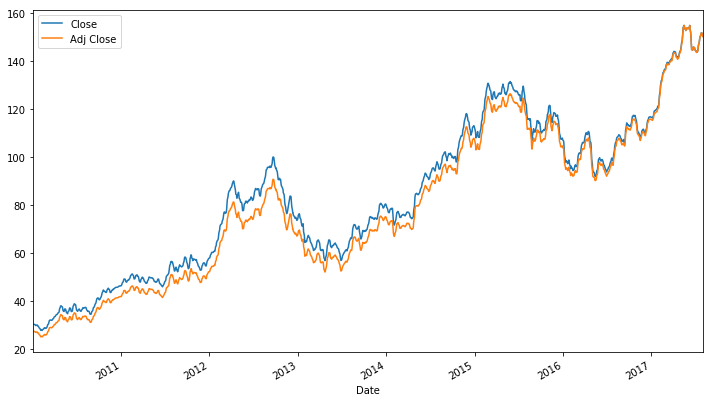

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

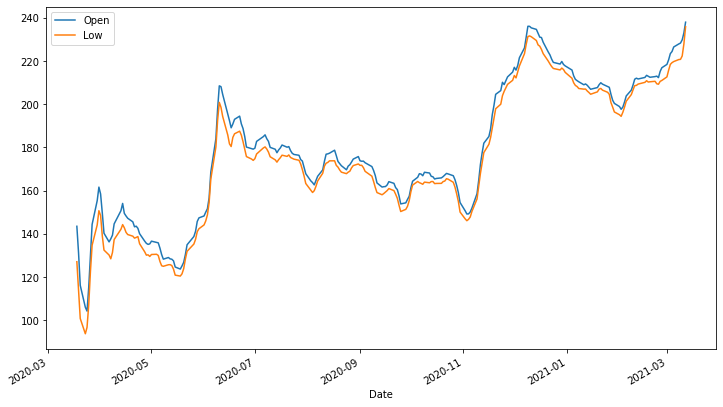

In [ ]:
#miejemplo
ba.rolling(5)[['Open','Low']].mean().plot()

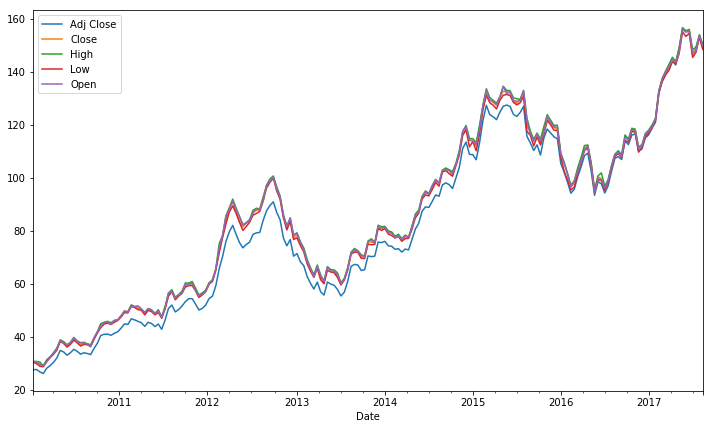

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

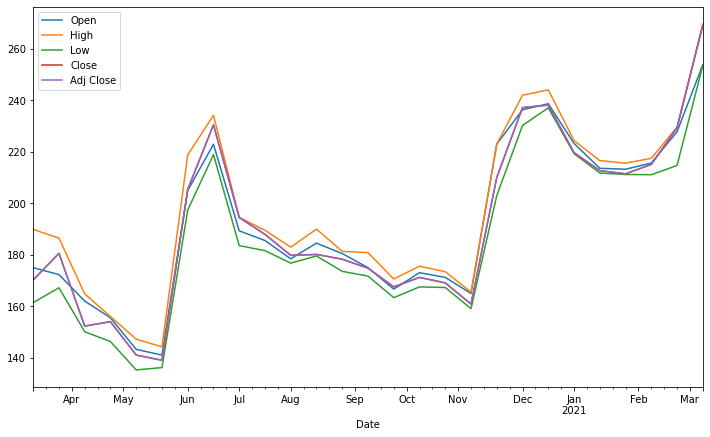

In [ ]:
#miejemplo
ba.drop('Volume',axis=1).resample('2W').max().plot()

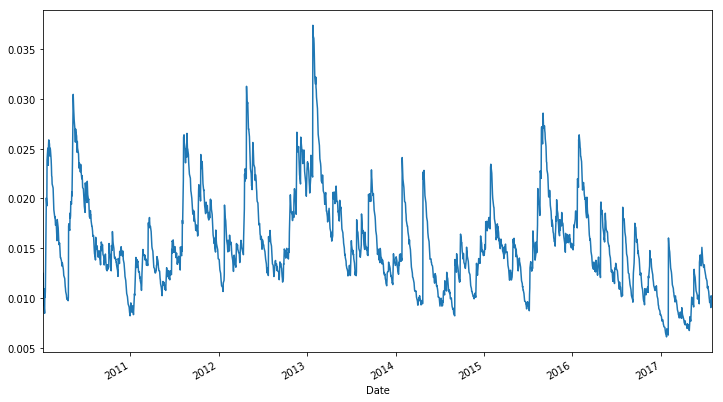

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

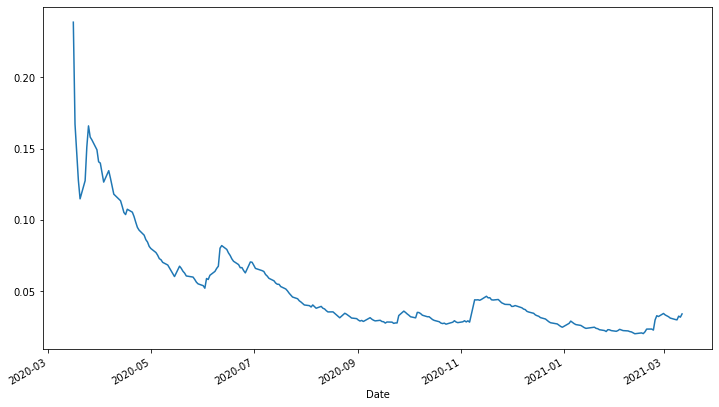

In [ ]:
#miejemplo
ba['Close'].pct_change().ewm(span=30).std().plot()

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

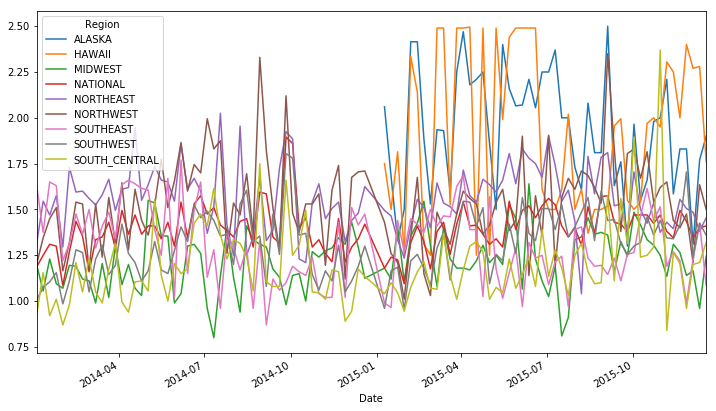

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

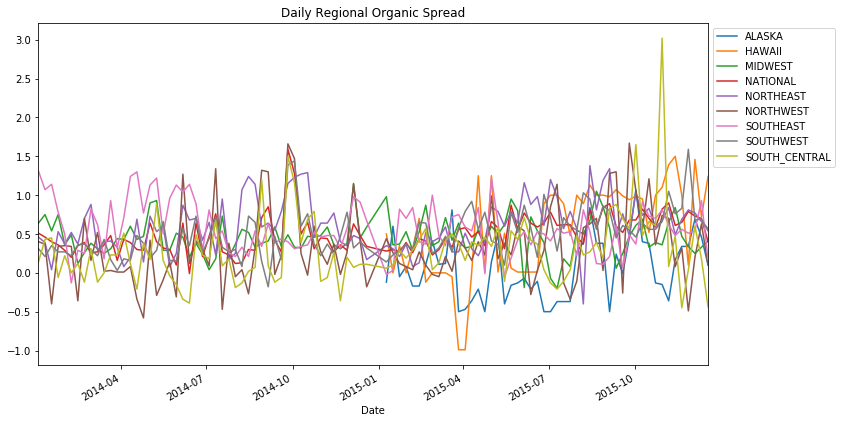

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


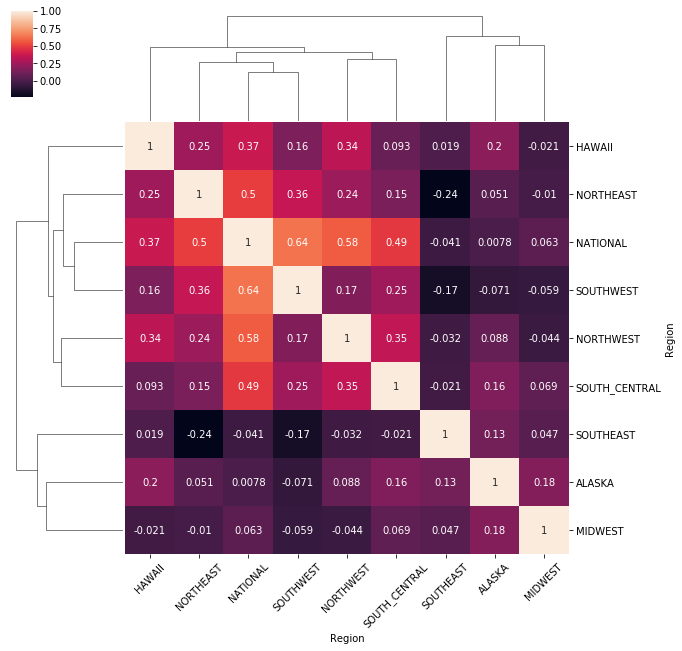

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#OWN REAL WORD DATA 

In [6]:
import matplotlib.pyplot as plt

> ## **DATOS PRUEBAS SABER11 2020-1**

In [7]:
saber = pd.read_csv('/content/AlgorithmsUN2021I/Lab2/Saber_11__2020-1.csv') 
saber.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,CC,COLOMBIA,F,01/01/1985,20201,SB11202010045555,ESTUDIANTE,COLOMBIA,No,CESAR,20.0,SAN DIEGO,20750.0,Estrato 1,5 a 6,Uno,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia",Trabaja por cuenta propia (por ejemplo plomero...,No,No,No,No,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Mejor,No leo por entretenimiento,No Navega Internet,Más de 30 horas,"Si, en efectivo",57372,120750000415,I.E. MANUEL RODRIGUEZ TORICES,MIXTO,OFICIAL,A,S,TÉCNICO/ACADÉMICO,120750000415,I.E. MANUEL RODRIGUEZ TORICES,S,URBANO,NOCHE,20750,SAN DIEGO,20,CESAR,N,20001,VALLEDUPAR,CESAR,20,39,6,2,32,4,1,35,6,1,24,1,1,36.0,7,A-,164,2.0,VALIDEZ OFICINA JURÍDICA,GENERACION E - GRATUIDAD
1,CC,COLOMBIA,F,01/01/1995,20201,SB11202010045719,ESTUDIANTE,COLOMBIA,No,NARIÑO,52.0,IPIALES,52356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177618,352356001951,INSTITUTO DE EDUCACIÓN TECNICA INESUR,MIXTO,NO OFICIAL,A,NaN,NaN,352356001951,INSTITUTO DE EDUCACIÓN TECNICA INESUR - SEDE P...,S,URBANO,SABATINA,52356,IPIALES,52,NARIÑO,N,52356,IPIALES,NARIÑO,52,41,7,2,41,12,2,39,10,1,44,23,2,30.0,3,A-,202,10.0,PUBLICAR,GENERACION E - GRATUIDAD
2,CC,COLOMBIA,F,01/01/1997,20201,SB11202010070662,ESTUDIANTE,COLOMBIA,Si,CAUCA,19.0,TOTORÓ,19824.0,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,NaN,NaN,Igual,30 minutos o menos,No Navega Internet,Entre 11 y 20 horas,"Si, en efectivo",135301,319001004669,COORPORACION EDUCATIVA DEL SUR OCCIDENTE COLOM...,MIXTO,NO OFICIAL,OTRO,NaN,ACADÉMICO,319001004669,COORPORACION EDUCATIVA DEL SUR OCCIDENTE COLOM...,S,URBANO,MAÑANA,19001,POPAYÁN,19,CAUCA,N,19001,POPAYÁN,CAUCA,19,37,4,2,36,7,2,33,4,1,24,1,1,30.0,3,A-,162,2.0,PUBLICAR,GENERACION E - GRATUIDAD
3,CC,COLOMBIA,F,01/01/2001,20201,SB11202010069926,ESTUDIANTE,COLOMBIA,No,PUTUMAYO,86.0,MOCOA,86001.0,Estrato 1,1 a 2,Uno,Técnica o tecnológica completa,Educación profesional completa,"Es dueño de un negocio grande, tiene un cargo ...","Trabaja como profesional (por ejemplo médico, ...",Si,No,Si,Si,No,No,Si,No,11 A 25 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,30 min

In [8]:
#miejemplo
saber.dtypes

ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
DESEMP_INGLES                object
PUNT_GLOBAL                   int64
PERCENTIL_GLOBAL            float64
ESTU_ESTADOINVESTIGACION     object
ESTU_GENERACION-E            object
Length: 78, dtype: object

Text(0, 0.5, 'PUNTAJE GLOBAL')

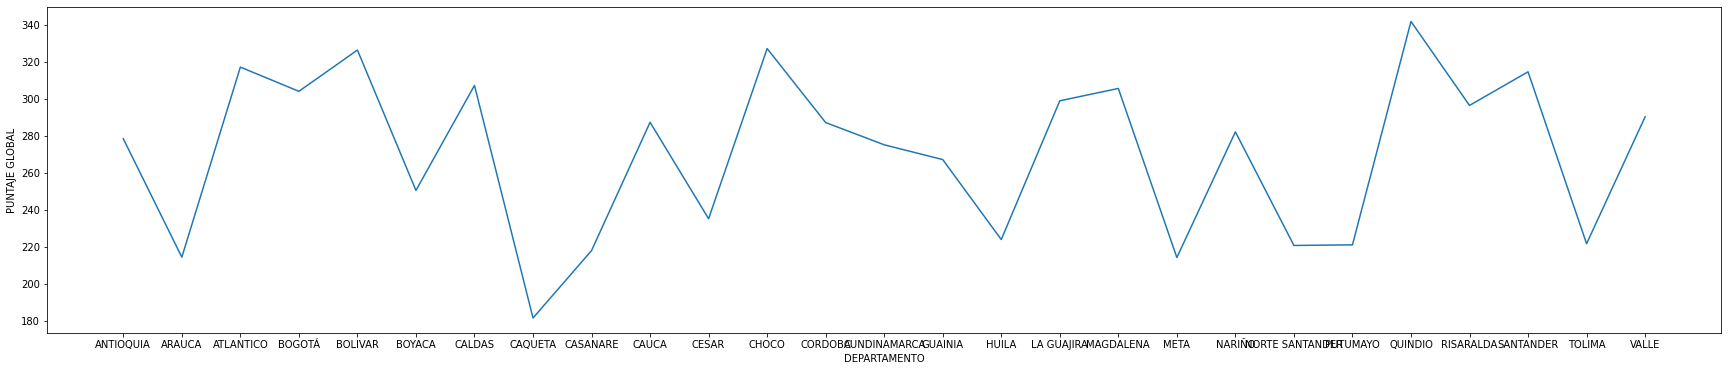

In [9]:
departamento = saber.groupby(['ESTU_DEPTO_RESIDE'])['PUNT_GLOBAL'].mean()
plt.figure(figsize=(30,6))
plt.plot(departamento)
plt.xlabel('DEPARTAMENTO')
plt.ylabel('PUNTAJE GLOBAL')

## **DATOS PRUEBAS SABER11 2020-1 BOGOTA**

> Se usara a partir de aca unicamente los datos de estudiantes de Bogotá, buscando reducir la diferencia que pueda haber en el puntaje debido a la condiciones del departamento, para intentar buscar la relacion de algunos datos, ya que como podemos observar en la gráfica superior los puntajes medios varian mucho por departamento.

In [10]:
datos_bogota = saber[saber.ESTU_DEPTO_RESIDE =='BOGOTÁ']
datos_bogota.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
8,CC,COLOMBIA,F,04/01/1989,20201,SB11202010067334,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 5,5 a 6,Tres,Ninguno,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Si,No,Si,Si,No,No,No,No,26 A 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",88575,311001047723,COL CENT DE PROMOCION SAN JOSE,MIXTO,NO OFICIAL,A,N,ACADÉMICO,311001047723,COL CENT DE PROMOCION SAN JOSE,S,URBANO,SABATINA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,35,3,1,29,2,1,28,1,1,39,15,1,29.0,2,A-,162,2.0,PUBLICAR,NO
13,CC,COLOMBIA,F,06/01/1997,20201,SB11202010071588,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,NaN,3 a 4,Dos,Primaria completa,Educación profesional completa,Es vendedor o trabaja en atención al público,"Trabaja como profesional (por ejemplo médico, ...",Si,Si,No,No,No,No,Si,No,11 A 25 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,Todos o casi todos los días,Igual,30 minutos o menos,30 minutos o menos,Más de 30 horas,No,74500,311001091595,COL TRIANGULO KENNEDY,MIXTO,NO OFICIAL,A,N,ACADÉMICO,311001091595,COL TRIANGULO KENNEDY,S,URBANO,NOCHE,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,60,47,3,48,22,2,43,17,2,49,33,2,35.0,6,A-,244,25.0,PUBLICAR,GENERACION E - GRATUIDAD
14,CC,COLOMBIA,F,06/01/1998,20201,SB11202010071758,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 2,1 a 2,Uno,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Si,No,NaN,Si,NaN,NaN,NaN,NaN,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,NaN,30 minutos o menos,Entre 30 y 60 minutos,0,NaN,663542,311001800014,COLEGIO CENCOSISTEMAS SUBA,MIXTO,NO OFICIAL,OTRO,NaN,NaN,311001800014,COLEGIO CENCOSISTEMAS SUBA - SEDE PRINCIPAL,S,URBANO,SABATINA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,33,2,1,24,1,1,40,12,1,31,6,1,31.0,3,A-,160,2.0,PUBLICAR,NO
19,CC,COLOMBIA,F,08/01/1993,20201,SB11202010072212,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 2,5 a 6,Cinco,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,"Trabaja como personal de limpieza, mantenimien...","Trabaja como personal

### **Buscando observar si existe una posible relación entre la dedicación a la lectura, el acceso continuo a internet (visto como el tiempo que dedican las personas al internet) y el puntaje global obtenido en las pruebas saber11**

In [18]:
puntaje_lectura = datos_bogota.groupby(['ESTU_DEDICACIONLECTURADIARIA'])['PUNT_GLOBAL'].mean()
print(puntaje_lectura)

ESTU_DEDICACIONLECTURADIARIA
30 minutos o menos            301.821053
Entre 1 y 2 horas             318.651596
Entre 30 y 60 minutos         315.022059
Más de 2 horas                316.124031
No leo por entretenimiento    293.792142
Name: PUNT_GLOBAL, dtype: float64


In [12]:
puntaje_lectura = datos_bogota.groupby(['ESTU_DEDICACIONLECTURADIARIA'])['PUNT_GLOBAL'].std()*2
print(puntaje_lectura)

ESTU_DEDICACIONLECTURADIARIA
30 minutos o menos            127.263927
Entre 1 y 2 horas             109.923385
Entre 30 y 60 minutos         113.454884
Más de 2 horas                107.069197
No leo por entretenimiento    122.752814
Name: PUNT_GLOBAL, dtype: float64


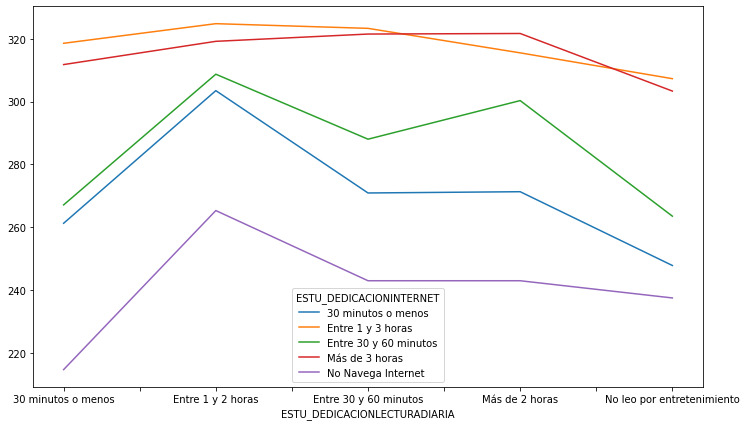

In [13]:
puntaje_lectura = datos_bogota.groupby(['ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET'])['PUNT_GLOBAL'].mean().unstack().ffill().plot();


#### **Conclusiones**
Basados unicamente en la media de puntajes obtenidos segun cada categoria de tiempo dedicado a la lectura, no hay mucha diferencia entre puntajes, aunque si se ve un repunte en las personas que dedican una hora o mas a leer, graficamente, en promedio, no varia mucho el puntaje global. Pero, podemos observar, con la varianza, que si cambian mucho los puntajes en el 96% de los datos, del orden de 100 puntos respecto a la media.

Algo que si se podría asegurar con más seguridad, es que aquellas personas que con cuentan con un acceso continuo a internet obtuvieron peores puntajes que auqellos que sí, midiendo el acceso continuo a internet a partir del tiempo dedicado a estar en internet.

---

### **Relacion entre el tiempo de lectura y el puntaje obtenido en Lectura Crítica**

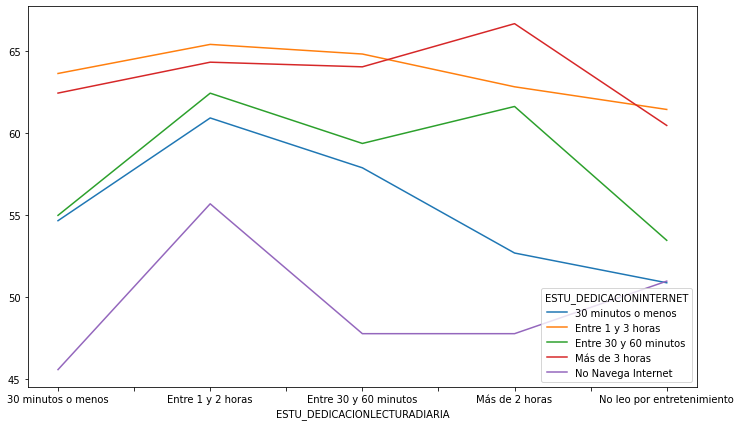

In [14]:
datos_bogota.groupby(['ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET'])['PUNT_LECTURA_CRITICA'].mean().unstack().ffill().plot();

In [15]:
puntaje_lectura2 = datos_bogota.groupby(['ESTU_DEDICACIONLECTURADIARIA'])['PUNT_LECTURA_CRITICA'].mean()
print(puntaje_lectura2)


ESTU_DEDICACIONLECTURADIARIA
30 minutos o menos            60.798246
Entre 1 y 2 horas             64.223404
Entre 30 y 60 minutos         63.370798
Más de 2 horas                64.542636
No leo por entretenimiento    58.922687
Name: PUNT_LECTURA_CRITICA, dtype: float64


In [ ]:
puntaje_lectura2 = datos_bogota.groupby(['ESTU_DEDICACIONLECTURADIARIA'])['PUNT_LECTURA_CRITICA'].std()*2
print(puntaje_lectura2)

ESTU_DEDICACIONLECTURADIARIA
30 minutos o menos            23.846274
Entre 1 y 2 horas             21.082501
Entre 30 y 60 minutos         21.243974
Más de 2 horas                20.688173
No leo por entretenimiento    23.207766
Name: PUNT_LECTURA_CRITICA, dtype: float64


#### **Conclusiones**
Se puede observar un comportamiento similar al observado en el puntaje global, se observa que aquellos que dedican entre 1 a 2 horas a la lectura obtienen mejor puntaje en lectura critica, aunque aquellos que navegan menos de 30 minutos en internet y dicen leer mas de  2 horas, obtuvieron peor puntaje.

Igualmente, se ve un mayor efecto en el puntaje dado por el acceso a internet continuo, que por la lectura, como se puede observar en aquellos que dedican una hora o más a navegar.

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!